In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.io import loadmat
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [9]:
data = loadmat('shuttle.mat')
X = data['X']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
class Autoencoder(keras.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = keras.Sequential([
            keras.layers.Dense(8, activation='relu'),
            keras.layers.Dense(5, activation='relu'),
            keras.layers.Dense(3, activation='relu')
        ])
        
        self.decoder = keras.Sequential([
            keras.layers.Dense(5, activation='relu'),
            keras.layers.Dense(8, activation='relu'),
            keras.layers.Dense(9, activation='sigmoid')
        ])
        
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0212 - val_loss: 0.0200
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - val_loss: 0.0182
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - val_loss: 0.0156
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - val_loss: 0.0123
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - val_loss: 0.0092
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - val_loss: 0.0069
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - val_loss: 0.0052
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

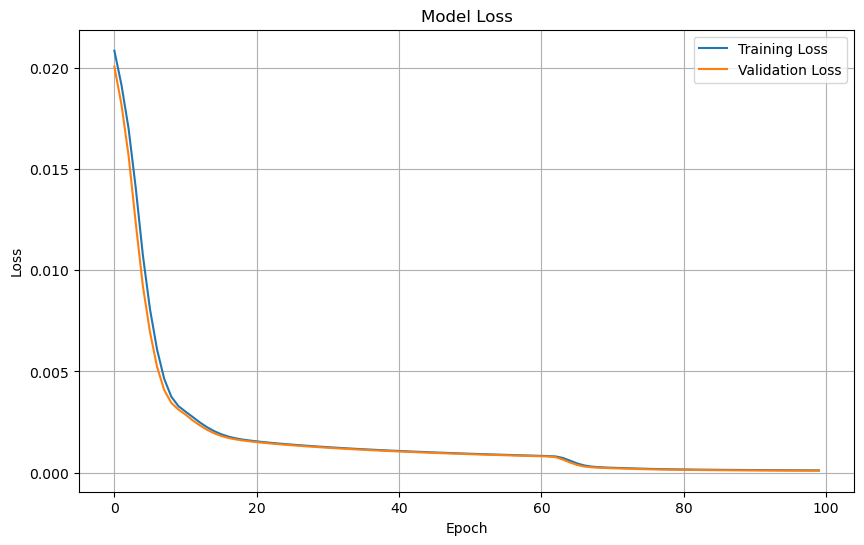

In [11]:
autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(X_train_scaled, X_train_scaled, 
                         epochs=100,
                         batch_size=1024,
                         validation_data=(X_test_scaled, X_test_scaled),
                         shuffle=True)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import balanced_accuracy_score

train_predictions = autoencoder.predict(X_train_scaled)
train_reconstruction_error = np.mean(np.power(X_train_scaled - train_predictions, 2), axis=1)

contamination = np.sum(y_train) / len(y_train)

threshold = np.quantile(train_reconstruction_error, 1 - contamination)

y_train_pred = (train_reconstruction_error > threshold).astype(int)
train_score = balanced_accuracy_score(y_train, y_train_pred)

test_predictions = autoencoder.predict(X_test_scaled)
test_reconstruction_error = np.mean(np.power(X_test_scaled - test_predictions, 2), axis=1)
y_test_pred = (test_reconstruction_error > threshold).astype(int)
test_score = balanced_accuracy_score(y_test, y_test_pred)

print(f"Training Balanced Accuracy: {train_score:.4f}")
print(f"Testing Balanced Accuracy: {test_score:.4f}")

768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step
Training Balanced Accuracy: 0.5440
Testing Balanced Accuracy: 0.5371
